The first World Happiness Report was released on April 1, 2012 as a foundational text for the UN High Level Meeting: Well-being and Happiness: Defining a New Economic Paradigm, drawing international attention.

The report outlined the state of world happiness, causes of happiness and misery, and policy implications highlighted by case studies. In 2013, the second World Happiness Report was issued, and since then has been issued on an annual basis with the exception of 2014.
 
The report primarily uses data from the Gallup World Poll. Each annual report is available to the public to download on the World Happiness Report website.

So, here is a report analysis on world happiness with Python on the data of 2019 provided by the United Nations.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('2019.csv')
df.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

#### Highlighting the maximum values of each attribute in the data set

In [3]:
def highlightMax(s):    
    isMax = s == s.max()
    return ['background-color: limegreen' if v else '' for v in isMax]
 
df.style.apply(highlightMax)

In [4]:
df.shape

(156, 9)

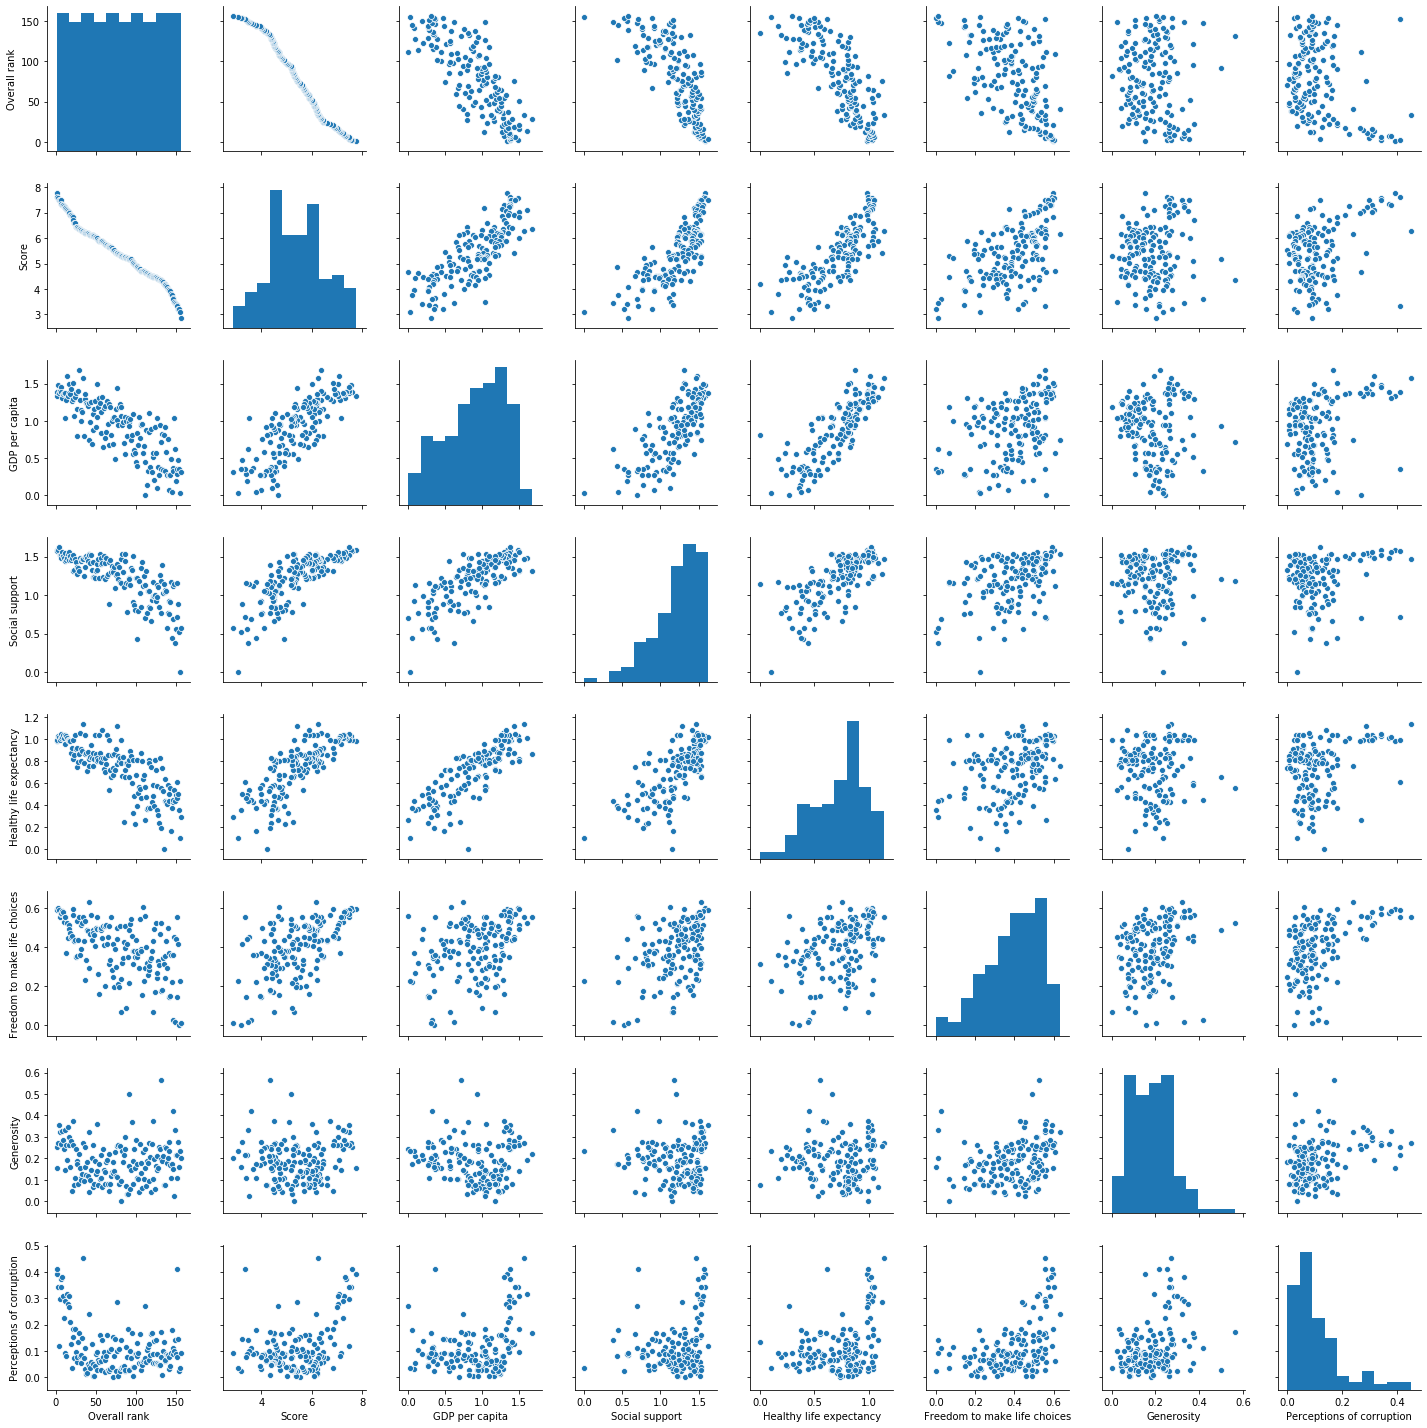

In [5]:
sb.pairplot(df)

#### Top 10 countries for each attribute

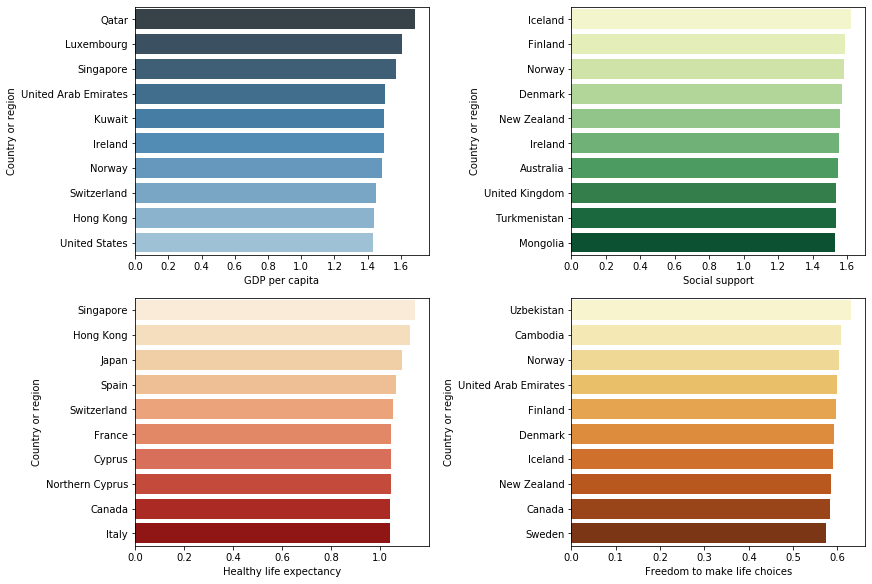

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sb.barplot(x='GDP per capita', y='Country or region',data=df.nlargest(10,'GDP per capita'),ax=axes[0,0],palette="Blues_d")

sb.barplot(x='Social support', y='Country or region',data=df.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")

sb.barplot(x='Healthy life expectancy', y='Country or region',data=df.nlargest(10,'Healthy life expectancy'),
           ax=axes[1,0],palette='OrRd')

sb.barplot(x='Freedom to make life choices', y='Country or region',data=df.nlargest(10,'Freedom to make life choices'),
           ax=axes[1,1],palette='YlOrBr')

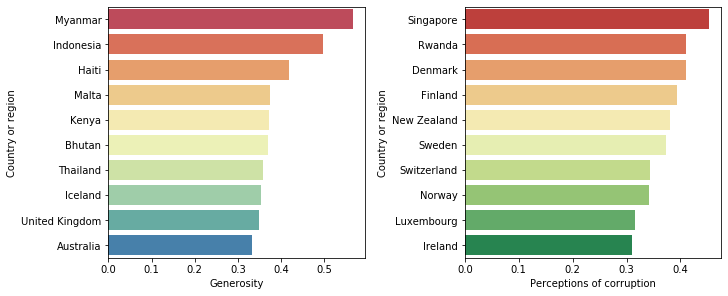

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sb.barplot(x='Generosity', y='Country or region',data=df.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sb.barplot(x='Perceptions of corruption', y='Country or region',data=df.nlargest(10,'Perceptions of corruption'),
            ax=axes[1],palette='RdYlGn')

Now I want to give a category to each country as High,Mid and Low according to their happiness scores.Thus we have to find out the bound in which these categories shall lie in.

In [8]:
print('Max: ', df['Score'].max())
print('Min: ', df['Score'].min())
add = df['Score'].max() - df['Score'].min()
grp = round(add/3,3)
print('Range difference: ',(grp))

Max:  7.769
Min:  2.853
Range difference:  1.639


In [9]:
low = df['Score'].min() + grp
mid = low + grp

print('Upper bound of Low grp: ',low)
print('Upper bound of Mid grp: ',mid)
print('Upper bound of High grp','max: ',df['Score'].max())

Upper bound of Low grp:  4.492
Upper bound of Mid grp:  6.131
Upper bound of High grp max:  7.769


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Finally adding a new column Category to the data set and distributing the levels High,Low,Mid.

In [11]:
category = []
for i in df.Score:
    if i>0 and i<low:
        category.append('Low')
        
        
    elif i>low and i<mid:
         category.append('Mid')
    else:
         category.append('High')

df['Category']=category  

Also we will be styling the data set as a green zone and red zone .If the country belongs to the High category then it is under the green zone and if it is under the Mid or Low category it is going to be the red zone.

In [12]:
color = (df.Category == 'High' ).map({True: 'background-color: limegreen',False:'background-color: red'})
df.style.apply(lambda s: color)

In [13]:
df.loc[df['Country or region']=='India']

Overall rank Country or region  Score  GDP per capita  Social support  \
139           140             India  4.015           0.755           0.765   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
139                    0.588                         0.498         0.2   

     Perceptions of corruption Category  
139                      0.085      Low

Lets have a head to head comparison for the some random countries to understand why they have such a good or a band rank worldwide and get some insight.



In [14]:
data={
    'Country or region':['Canada','US','UK','India'],
    'Score':[7.278,6.892,7.054,4.015],
    'GDP per capita':[1.365,1.433,1.333,0.755],
    'Social support':[1.505,1.457,1.538,0.765],
    'Healthy life expectancy':[1.039,0.874,0.996,0.588],
    'Freedom to make life choices':[0.584,0.454,0.45,0.498],
    'Generosity':[0.285,0.28,0.348,0.2],
    'Perceptions of corruption':[0.308,0.128,0.278,0.085]
}
d = pd.DataFrame(data)
d

Country or region  Score  GDP per capita  Social support  \
0            Canada  7.278           1.365           1.505   
1                US  6.892           1.433           1.457   
2                UK  7.054           1.333           1.538   
3             India  4.015           0.755           0.765   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    1.039                         0.584       0.285   
1                    0.874                         0.454       0.280   
2                    0.996                         0.450       0.348   
3                    0.588                         0.498       0.200   

   Perceptions of corruption  
0                      0.308  
1                      0.128  
2                      0.278  
3                      0.085

# Social Support vs GDP per capita vs Healthy life expectancy

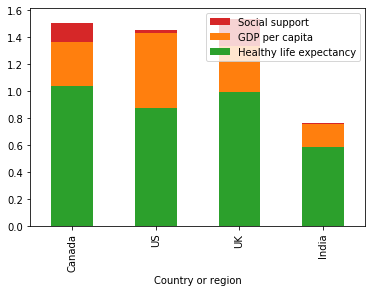

In [15]:
ax = d.plot(y="Social support", x="Country or region", kind="bar",color='C3')
d.plot(y="GDP per capita", x="Country or region", kind="bar", ax=ax, color="C1")
d.plot(y="Healthy life expectancy", x="Country or region", kind="bar", ax=ax, color="C2")

plt.show()

# Freedom to make life choices vs Generosity vs Corruption

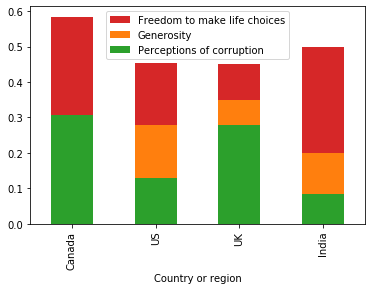

In [16]:
ax = d.plot(y="Freedom to make life choices", x="Country or region", kind="bar",color='C3')
d.plot(y="Generosity", x="Country or region", kind="bar", ax=ax, color="C1",)
d.plot(y="Perceptions of corruption", x="Country or region", kind="bar", ax=ax, color="C2",)

plt.show()

# Geographic Visualization of Happiness Score

In [17]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = df['Country or region'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['Score'], 
           text = df['Country or region'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)